<a href="https://colab.research.google.com/github/zyberg2091/CV-tutorials/blob/master/Image%20Classification/MNIST_dataset_classification(_Using_ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
# !pip install tensorflow==2.1.0
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
data=tf.keras.datasets.mnist 

In [ ]:
type(data)

module

In [ ]:
(x_train,y_train),(x_test,y_test)=data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [ ]:
#scaling
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#build the model
import tensorflow as tf
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(10,activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4869 - accuracy: 0.8544 - val_loss: 0.1383 - val_accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1465 - accuracy: 0.9569 - val_loss: 0.1033 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1015 - accuracy: 0.9687 - val_loss: 0.0822 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0807 - accuracy: 0.9750 - val_loss: 0.0718 - val_accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0680 - accuracy: 0.9791 - val_loss: 0.0741 - val_accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0612 - accuracy: 0.9803 - val_loss: 0.0656 - val_accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0502 - accuracy: 0.9837 - val_loss: 0.0681 - val_accuracy:

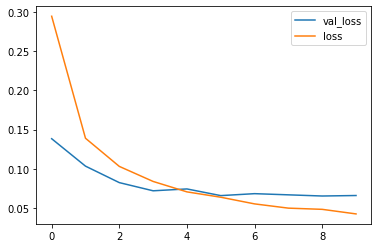

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['val_loss'],label='val_loss')
plt.plot(r.history['loss'],label='loss')
plt.legend()

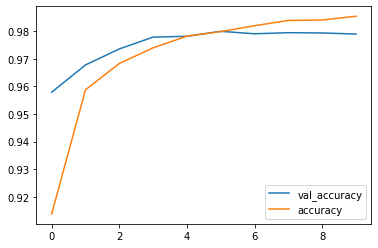

In [ ]:
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.plot(r.history['accuracy'],label='accuracy')
plt.legend()

In [ ]:
np.asarray(tf.math.argmax(model(x_test),1))

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_pred=model.predict(x_test).argmax(axis=1)
len(y_pred)

10000

In [ ]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[ 969,    1,    1,    0,    0,    2,    3,    1,    2,    1],
       [   0, 1122,    3,    1,    0,    1,    2,    1,    5,    0],
       [   1,    1, 1011,    4,    2,    0,    0,    3,   10,    0],
       [   0,    0,    3,  990,    0,    5,    0,    5,    3,    4],
       [   2,    0,    4,    0,  957,    0,    4,    2,    1,   12],
       [   2,    0,    0,    5,    2,  874,    3,    1,    4,    1],
       [   4,    3,    0,    1,    4,    4,  940,    0,    2,    0],
       [   2,    4,   13,    2,    0,    0,    0, 1000,    1,    6],
       [   2,    0,    5,    3,    4,    4,    2,    2,  949,    3],
       [   2,    4,    1,    6,    8,    5,    0,    4,    1,  978]])

In [ ]:
y_pred.shape

(10000,)

Text(0.5, 1.0, 'True label: 4 , predicted: 7')

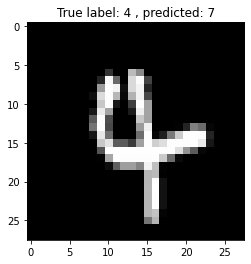

In [ ]:
#misclassified classifications
misclassified_index=np.where(y_test!=y_pred)
i=np.random.choice(misclassified_index[0])
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s , predicted: %s" % (y_test[i],y_pred[i]))


In [ ]:
misclassified_index

(array([ 115,  247,  259,  320,  321,  340,  381,  445,  495,  582,  613,
         619,  691,  720,  740,  810,  846,  944,  947,  951,  956, 1014,
        1039, 1044, 1112, 1156, 1178, 1181, 1194, 1226, 1232, 1242, 1247,
        1260, 1299, 1319, 1328, 1393, 1414, 1441, 1494, 1522, 1530, 1549,
        1553, 1609, 1621, 1681, 1709, 1751, 1754, 1790, 1800, 1901, 1941,
        1982, 1987, 2004, 2016, 2024, 2040, 2053, 2070, 2098, 2109, 2118,
        2129, 2130, 2135, 2182, 2189, 2280, 2293, 2326, 2369, 2387, 2406,
        2414, 2422, 2447, 2488, 2607, 2648, 2654, 2758, 2877, 2939, 2953,
        2995, 3005, 3073, 3117, 3422, 3475, 3490, 3503, 3520, 3558, 3559,
        3567, 3597, 3604, 3751, 3757, 3776, 3780, 3796, 3808, 3817, 3818,
        3853, 3869, 3876, 3893, 3906, 3941, 3943, 3985, 4065, 4078, 4140,
        4163, 4176, 4199, 4201, 4224, 4248, 4289, 4294, 4355, 4360, 4382,
        4384, 4419, 4433, 4443, 4497, 4504, 4536, 4601, 4635, 4690, 4731,
        4740, 4807, 4823, 4833, 4880, 

In [ ]:
model.save(' MNIST dataset classification( Using ANN)')

INFO:tensorflow:Assets written to:  MNIST dataset classification( Using ANN)/assets


In [ ]:
z=tf.keras.layers.Flatten(input_shape=(28,28))

In [ ]:
!pip install coremltools

     |████████████████████████████████| 3.4MB 9.1MB/s 
  Created wheel for attr: filename=attr-0.3.1-cp36-none-any.whl size=2459 sha256=67ffd89c0fec2fc6c37b796df4235c5916701adec70a4929d2a637337761c232
  Stored in directory: /root/.cache/pip/wheels/f0/96/9b/1f8892a707d17095b5a6eab0275da9d39e68e03a26aee2e726
Successfully built attr


In [ ]:
import coremltools as ct

In [ ]:
m=ct.convert(model, source='tensorflow')

Translating MIL ==> MLModel Ops: 100%|██████████| 11/11 [00:00<00:00, 618.84 ops/s]


In [ ]:
type(m)

coremltools.models.model.MLModel